In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessionF

/kaggle/input/pokemon-stats/pokemon.csv


In [2]:
import seaborn as sns

In [3]:
pokemon = pd.read_csv('/kaggle/input/pokemon-stats/pokemon.csv')

In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


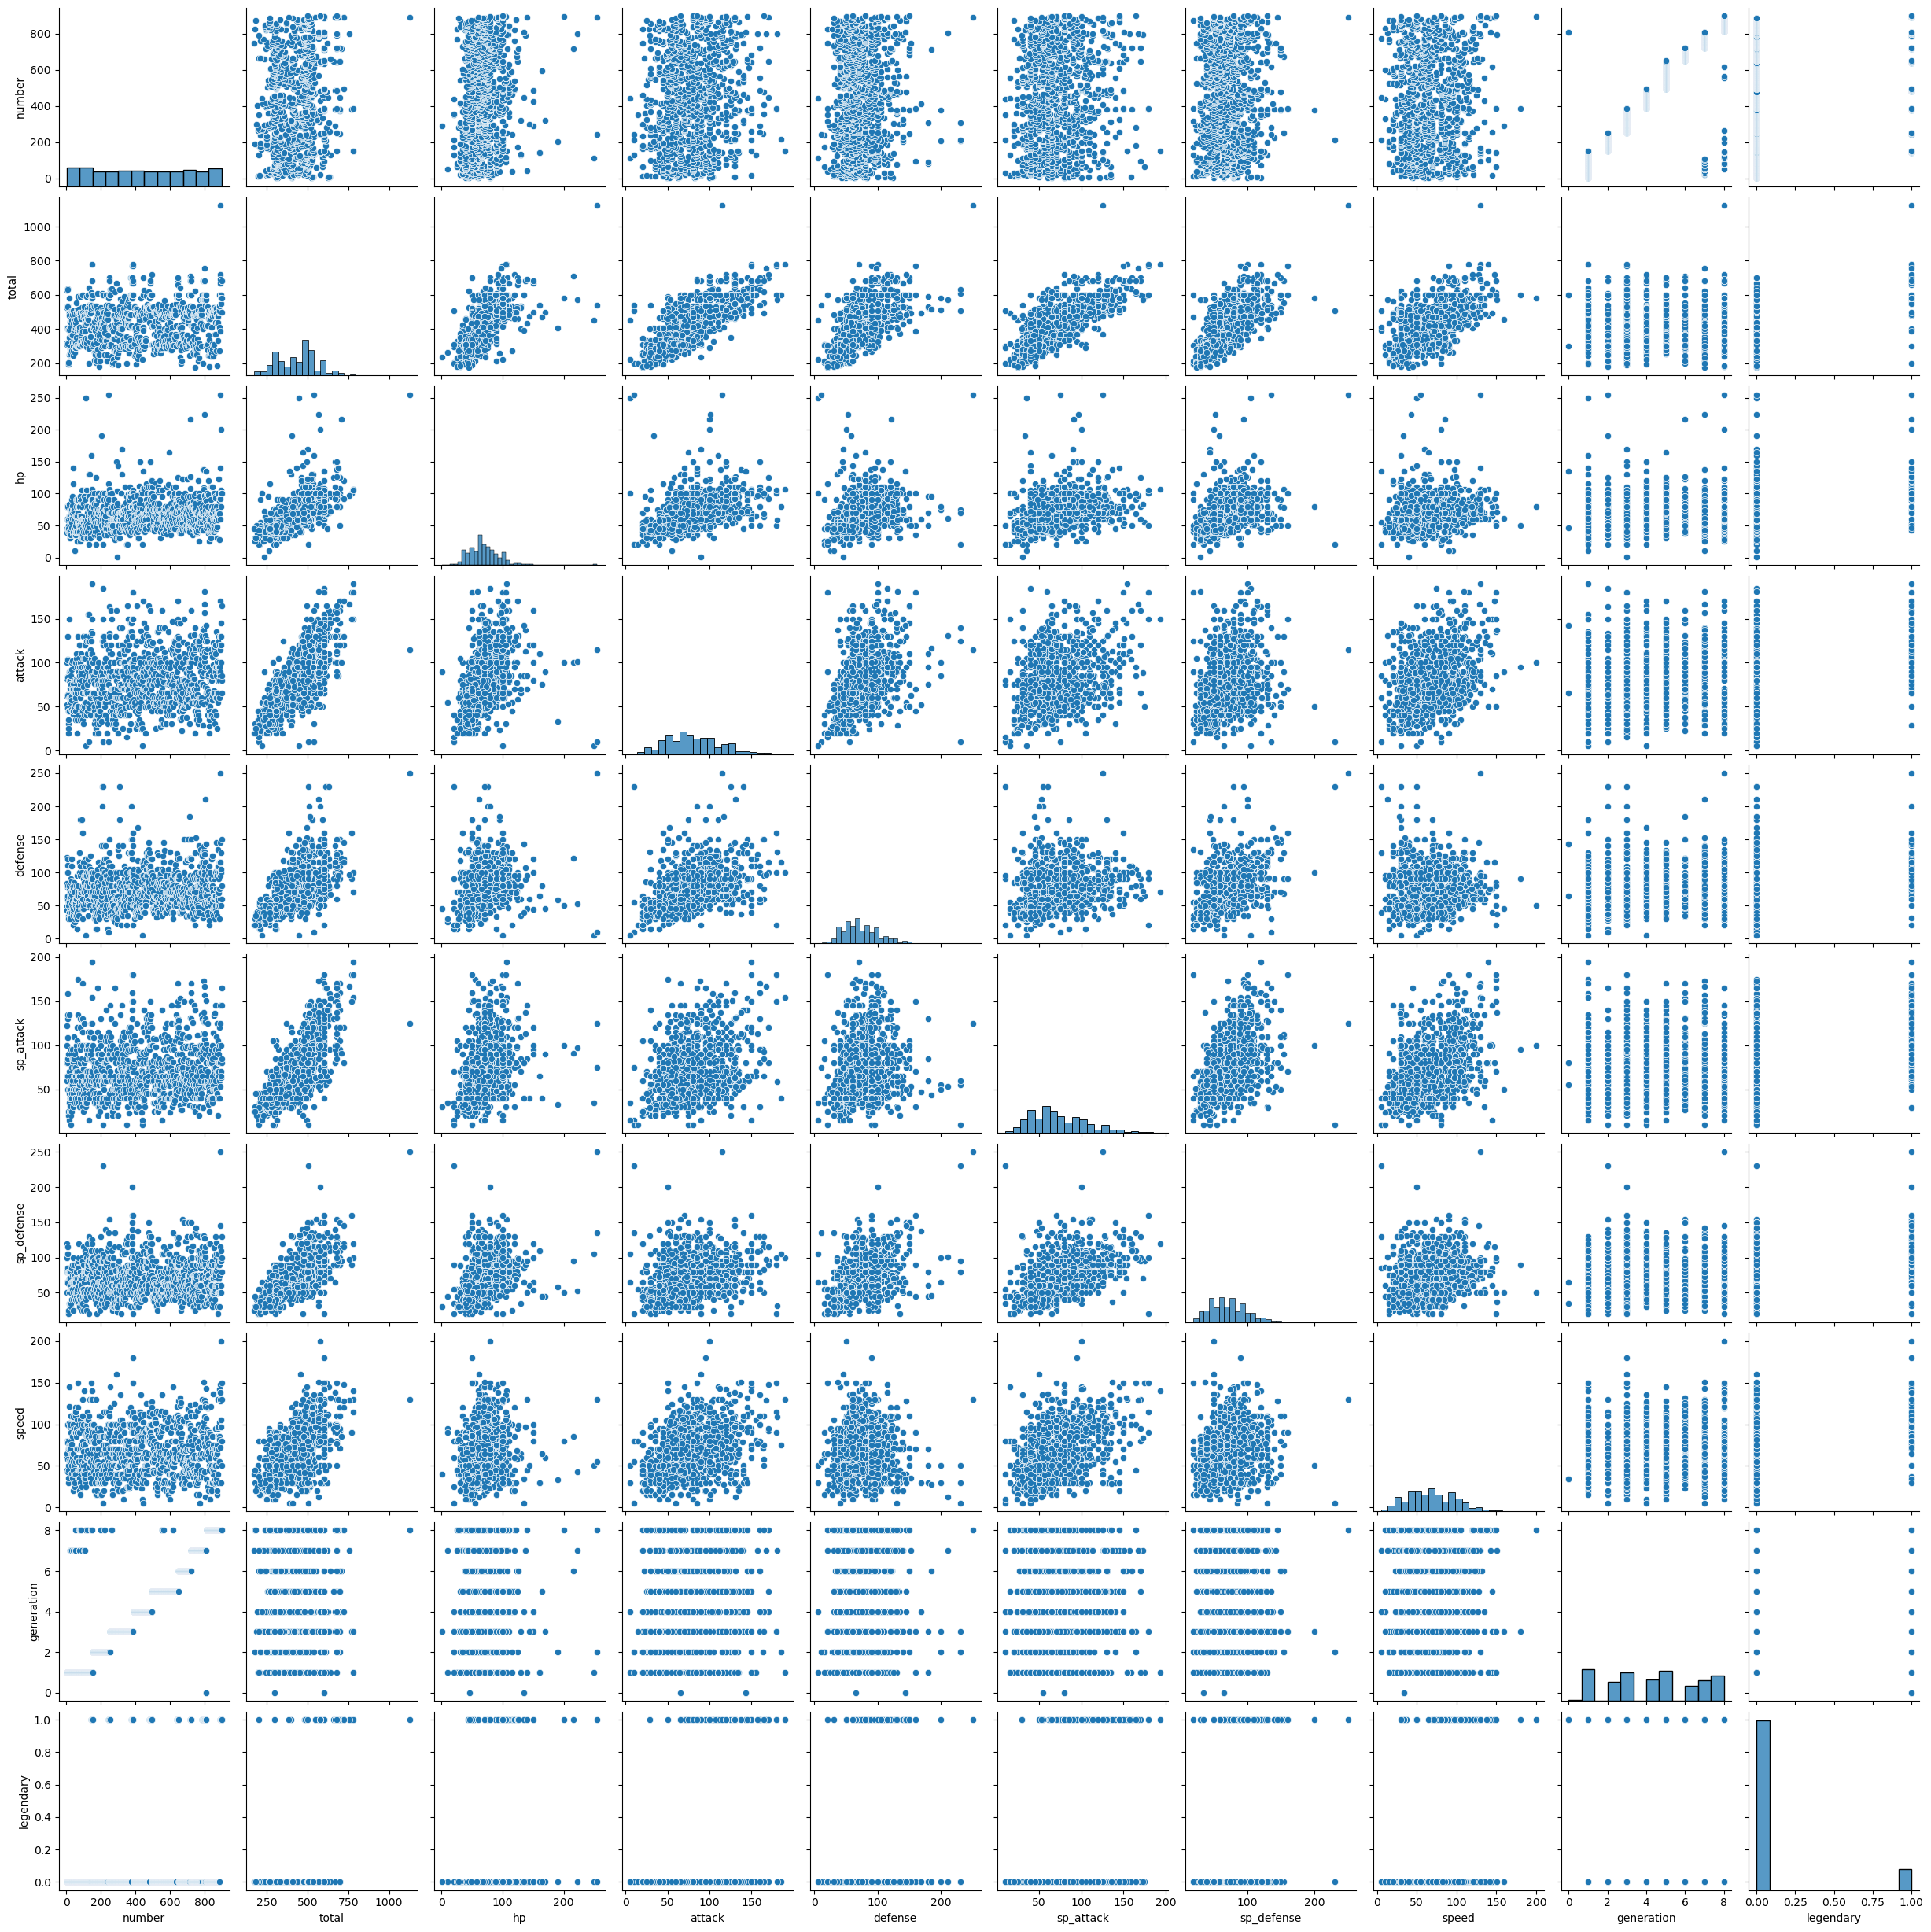

In [5]:
sns.pairplot(data=pokemon)

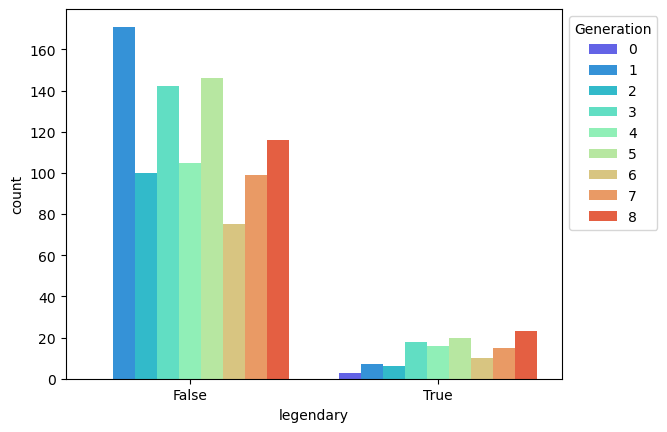

In [6]:
gen = sns.countplot(data=pokemon, x='legendary', hue='generation', palette='rainbow')
plt.legend(title='Generation')
sns.move_legend(gen, "upper left", bbox_to_anchor=(1, 1))

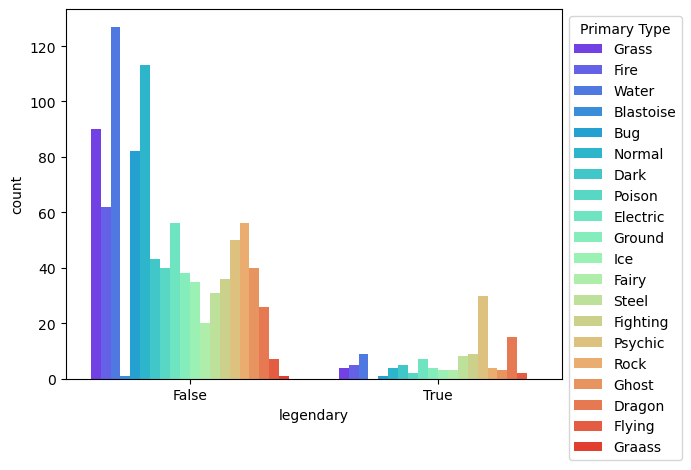

In [7]:
poketype = sns.countplot(data=pokemon, x='legendary', hue='type1', palette='rainbow')
plt.legend(title='Primary Type')
sns.move_legend(poketype, "upper left", bbox_to_anchor=(1, 1))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
cat_type1 = ['type1']

In [10]:
final_data = pd.get_dummies(pokemon, columns=cat_type1, drop_first = True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   number          1072 non-null   int64 
 1   name            1072 non-null   object
 2   type2           574 non-null    object
 3   total           1072 non-null   int64 
 4   hp              1072 non-null   int64 
 5   attack          1072 non-null   int64 
 6   defense         1072 non-null   int64 
 7   sp_attack       1072 non-null   int64 
 8   sp_defense      1072 non-null   int64 
 9   speed           1072 non-null   int64 
 10  generation      1072 non-null   int64 
 11  legendary       1072 non-null   bool  
 12  type1_Bug       1072 non-null   uint8 
 13  type1_Dark      1072 non-null   uint8 
 14  type1_Dragon    1072 non-null   uint8 
 15  type1_Electric  1072 non-null   uint8 
 16  type1_Fairy     1072 non-null   uint8 
 17  type1_Fighting  1072 non-null   uint8 
 18  type1_Fi

In [11]:
# The number is confounding - it's a label, not a feature for analysis
final_data = final_data.drop(['number', 'type2', 'name'], axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   total           1072 non-null   int64
 1   hp              1072 non-null   int64
 2   attack          1072 non-null   int64
 3   defense         1072 non-null   int64
 4   sp_attack       1072 non-null   int64
 5   sp_defense      1072 non-null   int64
 6   speed           1072 non-null   int64
 7   generation      1072 non-null   int64
 8   legendary       1072 non-null   bool 
 9   type1_Bug       1072 non-null   uint8
 10  type1_Dark      1072 non-null   uint8
 11  type1_Dragon    1072 non-null   uint8
 12  type1_Electric  1072 non-null   uint8
 13  type1_Fairy     1072 non-null   uint8
 14  type1_Fighting  1072 non-null   uint8
 15  type1_Fire      1072 non-null   uint8
 16  type1_Flying    1072 non-null   uint8
 17  type1_Ghost     1072 non-null   uint8
 18  type1_Graass    1072 non-nul

In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   total           1072 non-null   int64
 1   hp              1072 non-null   int64
 2   attack          1072 non-null   int64
 3   defense         1072 non-null   int64
 4   sp_attack       1072 non-null   int64
 5   sp_defense      1072 non-null   int64
 6   speed           1072 non-null   int64
 7   generation      1072 non-null   int64
 8   legendary       1072 non-null   bool 
 9   type1_Bug       1072 non-null   uint8
 10  type1_Dark      1072 non-null   uint8
 11  type1_Dragon    1072 non-null   uint8
 12  type1_Electric  1072 non-null   uint8
 13  type1_Fairy     1072 non-null   uint8
 14  type1_Fighting  1072 non-null   uint8
 15  type1_Fire      1072 non-null   uint8
 16  type1_Flying    1072 non-null   uint8
 17  type1_Ghost     1072 non-null   uint8
 18  type1_Graass    1072 non-nul

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = final_data.drop('legendary', axis = 1)
y = final_data['legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc = RandomForestClassifier()

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
predicts = rfc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98       286
        True       0.85      0.81      0.83        36

    accuracy                           0.96       322
   macro avg       0.91      0.89      0.90       322
weighted avg       0.96      0.96      0.96       322



In [21]:
print(confusion_matrix(y_test, predicts))

[[281   5]
 [  7  29]]
